# **NAMA: FAKHRUL IBAD**
# **NIM: 2104111100212**

**1. Naive Bayes**

Import library, yaitu library numpy, matplotlib, dan pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ambil data dari ``https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv``, lalu dimasukkan ke dalam variabel dataset dan ditampilkan 10 contoh data pertama

In [28]:
dataset = pd.read_csv("https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv")
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Memisahkan nilai X dan nilai y, di mana nilai X adalah fitur, dan nilai y adalah target

In [29]:
X = dataset.iloc[:,:4].values
y = dataset['target'].values

Setelah data dimuat, lalu data dibagi menjadi 2 berupa *training set* dan *test set*, tiap kelas diberi urutan. Nilai 0.2 itu berarti 20%, dan dijadikan dalam *test set* sisa 80% dijadikan *training set*

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Data diperkecil ke rentang yang lebih kecil menggunakan Feature Scaling. Dalam hal ini, nilai X_train dan X_test diperkecil ke nilai yang lebih kecil untuk meningkatkan kecepatan program.

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Karena menggunakan metode Naive Bayes jadi menambahkan class GaussianNB yang diambil dari library sklearn.naive_bayes.

In [32]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Setelah model selesai, lalu menggunakan classifier.predict() untuk memprediksi nilai dari Test set dan nilai yang diprediksi akan disimpan dalam variabel y_pred.

In [33]:
y_pred = classifier.predict(X_test) 
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

Menentukan akurasi prediksi dengan menggunakan accuracy_score

In [36]:
from sklearn.metrics import accuracy_score 

akurasi = accuracy_score(y_test, y_pred)
akurasi = round(akurasi, 4)*100


print ("Akurasi: ", akurasi,"%")

Akurasi:  78.69 %


**2. KNN**

Import library yang diperlukan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Mengambil data dari csv yang tersedia

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Memisahkan data fitur dan data target

In [40]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 13].values

Membagi data training dan data test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y, random_state=42)

Standarisasi

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Menentukan Nilai  *k*

KNN membutuhkan suatu nilai konstanta *k* untuk menentukan berapa banyak tetangga yang akan digunakan oleh model. Kode di bawah ini akan melakukan training sebanyak 40 kali dengan nilai 
*k* dari 1 hingga 40. Angka 40 ini bersifat bebas dan dapat diganti dengan angka lain.

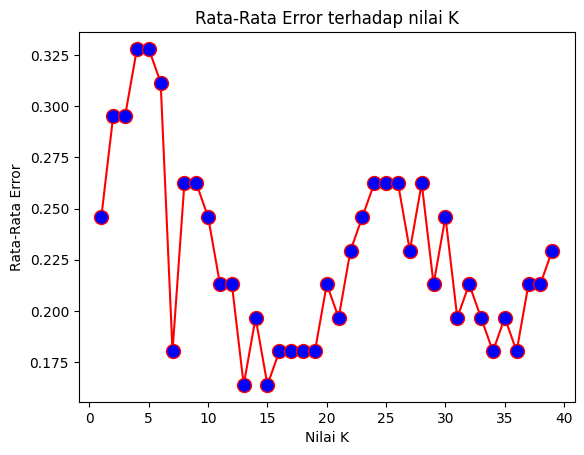

In [42]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Misal k yang digunakan adalah k = 4

In [43]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [44]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [45]:
akurasi = accuracy_score(y_test, y_pred)
akurasi = round(akurasi, 4)*100


print ("Akurasi: ", akurasi,"%")

Akurasi:  67.21000000000001 %
